In [15]:
import numpy as np
import matplotlib.pyplot as plt

Prateek KK
20BEC0102

In [8]:
from keras.preprocessing.image import ImageDataGenerator
img_gen=ImageDataGenerator(
    rotation_range=10,
    rescale=1/255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [3]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

# Simple CNN

In [4]:
image_shape=(150,150,3)
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten

In [5]:
batch_size = 16
train_image_gen = img_gen.flow_from_directory("Birds data/train_data/",
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 150 images belonging to 16 classes.


In [6]:
test_image_gen = img_gen.flow_from_directory('Birds data/test_data/',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 157 images belonging to 16 classes.


In [16]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(16,activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 36, 36, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 34, 34, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 17, 17, 64)      

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
import time
start=time.time()
results = model.fit_generator(train_image_gen,epochs=20,
                              steps_per_epoch=5,
                              validation_data=test_image_gen,
                              validation_steps=10)
stop=time.time()
print(f"Training time: {stop - start}s")

Epoch 1/20
5/5 [==============================] - 52s 12s/step - loss: 3.7415 - accuracy: 0.1500 - val_loss: 2.7401 - val_accuracy: 0.0510
Epoch 2/20
5/5 [==============================] - 48s 11s/step - loss: 2.7768 - accuracy: 0.1286 - val_loss: 2.7423 - val_accuracy: 0.1529
Epoch 3/20
5/5 [==============================] - 49s 12s/step - loss: 2.6139 - accuracy: 0.1750 - val_loss: 3.0466 - val_accuracy: 0.1338
Epoch 4/20
5/5 [==============================] - 50s 11s/step - loss: 2.8512 - accuracy: 0.1500 - val_loss: 2.7113 - val_accuracy: 0.1338
Epoch 5/20
5/5 [==============================] - 48s 11s/step - loss: 2.5147 - accuracy: 0.1429 - val_loss: 2.7035 - val_accuracy: 0.1146
Epoch 6/20
5/5 [==============================] - 52s 12s/step - loss: 2.5187 - accuracy: 0.1500 - val_loss: 2.7289 - val_accuracy: 0.1274
Epoch 7/20
5/5 [==============================] - 39s 9s/step - loss: 2.6036 - accuracy: 0.2000 - val_loss: 2.7306 - val_accuracy: 0.1720
Epoch 8/20
5/5 [============

Text(0, 0.5, 'Training accuracy')

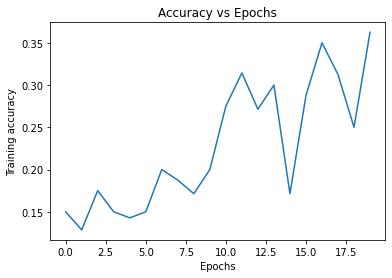

In [19]:
import matplotlib.pyplot as plt
plt.plot(results.history['accuracy'])
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Training accuracy")

Text(0, 0.5, 'Loss')

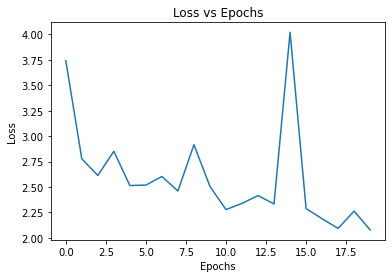

In [20]:
plt.plot(results.history['loss'])
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")

# Resnet 50 

In [3]:
from tensorflow.keras.applications import ResNet50


In [4]:
resnet = ResNet50(include_top=False,input_shape=(224,224,3),weights='imagenet')


In [5]:
image_shape=(244,244,3)

In [8]:
from keras.models import Model
from keras.layers import GlobalAveragePooling2D,Dense

In [17]:
x = resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(16, activation='softmax')(x)
for layer in resnet.layers:
  layer.trainable=False
res_model = Model(inputs=resnet.input, outputs=predictions)

x = Flatten()(resnet.output)
out = Dense(16, activation='softmax')(x)
res_model = Model(inputs=resnet.input,outputs=out)
for layer in resnet.layers:
  layer.trainable=False

In [9]:
batch_size = 16
train_image_gen = img_gen.flow_from_directory("Birds data/train_data/",
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 150 images belonging to 16 classes.


In [19]:
test_image_gen = img_gen.flow_from_directory('Birds data/test_data/',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 157 images belonging to 16 classes.


In [20]:
res_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [21]:
res_model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [22]:
res_model.fit(train_image_gen,epochs=20,validation_data=test_image_gen,steps_per_epoch=len(train_image_gen),
              validation_steps=len(test_image_gen))

Epoch 1/20
10/10 [==============================] - 67s 7s/step - loss: 4.9499 - accuracy: 0.0867 - val_loss: 2.8789 - val_accuracy: 0.1529
Epoch 2/20
10/10 [==============================] - 53s 6s/step - loss: 3.1283 - accuracy: 0.1133 - val_loss: 2.7565 - val_accuracy: 0.1401
Epoch 3/20
10/10 [==============================] - 48s 5s/step - loss: 2.9965 - accuracy: 0.1733 - val_loss: 2.7758 - val_accuracy: 0.0637
Epoch 4/20
10/10 [==============================] - 56s 6s/step - loss: 2.7743 - accuracy: 0.1400 - val_loss: 2.7452 - val_accuracy: 0.1210
Epoch 5/20
10/10 [==============================] - 62s 7s/step - loss: 2.8784 - accuracy: 0.0933 - val_loss: 2.7418 - val_accuracy: 0.1338
Epoch 6/20
10/10 [==============================] - 68s 7s/step - loss: 2.8034 - accuracy: 0.1400 - val_loss: 2.7217 - val_accuracy: 0.0955
Epoch 7/20
10/10 [==============================] - 66s 7s/step - loss: 2.6503 - accuracy: 0.1467 - val_loss: 2.7529 - val_accuracy: 0.1210
Epoch 8/20
10/10 [==

# Inception V3

In [34]:
from tensorflow.keras.applications import InceptionV3
from keras.layers import Input,Dense,GlobalAveragePooling2D
from keras import Model

In [35]:
inception = InceptionV3(include_top= False,)
inception.trainable = False
inputs = Input(shape =(300,300,3), name = "input-layer")
x = inception(inputs)
x = GlobalAveragePooling2D(name = "global_average_pooling_layer")(x)
outputs = Dense(16, activation = "softmax", name = "output-layer")(x)
incep_model = Model(inputs, outputs)

In [36]:
incep_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input-layer (InputLayer)    [(None, 300, 300, 3)]     0         
                                                                 
 inception_v3 (Functional)   (None, None, None, 2048)  21802784  
                                                                 
 global_average_pooling_laye  (None, 2048)             0         
 r (GlobalAveragePooling2D)                                      
                                                                 
 output-layer (Dense)        (None, 16)                32784     
                                                                 
Total params: 21,835,568
Trainable params: 32,784
Non-trainable params: 21,802,784
_________________________________________________________________


In [37]:
from tensorflow.keras.optimizers import Adam

In [10]:
batch_size = 16
image_shape=(244,244,3)
train_image_gen = img_gen.flow_from_directory("Birds data/train_data/",
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 150 images belonging to 16 classes.


In [39]:
test_image_gen = img_gen.flow_from_directory('Birds data/test_data/',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='categorical')

Found 157 images belonging to 16 classes.


In [40]:
incep_model.compile(loss = "categorical_crossentropy",
                optimizer = Adam(learning_rate = 0.075),
                metrics = ["accuracy"])

In [41]:
history = incep_model.fit(train_image_gen,
                                 epochs=10,
                                 steps_per_epoch = len(train_image_gen),
                                 validation_data = test_image_gen,
                                 validation_steps =int(0.75*len(test_image_gen)))

Epoch 1/10
10/10 [==============================] - 66s 6s/step - loss: 60.9674 - accuracy: 0.1133 - val_loss: 64.9462 - val_accuracy: 0.0625
Epoch 2/10
10/10 [==============================] - 61s 6s/step - loss: 24.5178 - accuracy: 0.4000 - val_loss: 36.6666 - val_accuracy: 0.3214
Epoch 3/10
10/10 [==============================] - 61s 6s/step - loss: 13.0010 - accuracy: 0.6467 - val_loss: 24.6626 - val_accuracy: 0.5089
Epoch 4/10
10/10 [==============================] - 59s 6s/step - loss: 5.1861 - accuracy: 0.8133 - val_loss: 30.7115 - val_accuracy: 0.4286
Epoch 5/10
10/10 [==============================] - 60s 6s/step - loss: 2.0137 - accuracy: 0.9000 - val_loss: 32.9750 - val_accuracy: 0.4375
Epoch 6/10
10/10 [==============================] - 56s 6s/step - loss: 3.9042 - accuracy: 0.8533 - val_loss: 24.8142 - val_accuracy: 0.4375
Epoch 7/10
10/10 [==============================] - 51s 5s/step - loss: 3.0557 - accuracy: 0.9000 - val_loss: 28.9322 - val_accuracy: 0.3393
Epoch 8/10

In [42]:
incep_model.save('Inception model.h5')

In [12]:
classind=train_image_gen.class_indices
print(classind)

{'blasti': 0, 'bonegl': 1, 'brhkyt': 2, 'cbrtsh': 3, 'cmnmyn': 4, 'gretit': 5, 'hilpig': 6, 'himbul': 7, 'himgri': 8, 'hsparo': 9, 'indvul': 10, 'jglowl': 11, 'lbicrw': 12, 'mgprob': 13, 'rebimg': 14, 'wcrsrt': 15}


In [13]:
predictions = list(classind.keys())
print(predictions)

['blasti', 'bonegl', 'brhkyt', 'cbrtsh', 'cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri', 'hsparo', 'indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']


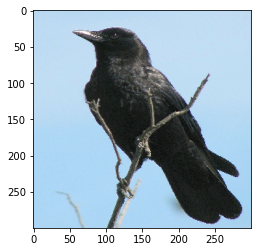

In [17]:
from tensorflow.keras.preprocessing import image
img1 = image.load_img('717px-Corvus_brachyrhynchos_1_(1).jpg',target_size=(300,300))
plt.imshow(img1)

In [18]:
img1 = image.img_to_array(img1)
pred = np.argmax(incep_model.predict(img1))
print(pred)
print(predictions[pred])

NameError: name 'incep_model' is not defined

In [7]:
from tensorflow import keras
model = keras.models.load_model('Inception model.h5')

In [5]:
predictions=['blasti', 'bonegl', 'brhkyt', 'cbrtsh', 'cmnmyn', 'gretit', 'hilpig', 'himbul', 'himgri', 'hsparo', 'indvul', 'jglowl', 'lbicrw', 'mgprob', 'rebimg', 'wcrsrt']

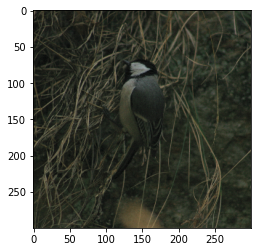

In [17]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
img1 = image.load_img("Birds data/test_data/gretit/11776135285_ccf938fa2e_o.jpg",target_size=(300,300))
plt.imshow(img1)

In [18]:
import numpy as np
img1 = image.img_to_array(img1)
img1 = np.expand_dims(img1,axis=0)
pred = np.argmax(model.predict(img1))
print(pred)
print(predictions[pred])

7
himbul
